In [1]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [2]:
# Load the trained model 
model = torch.load('/home/brian/models/run02/weights.pt')
# Set the model to evaluate mode
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [3]:
# Read the log file using pandas into a dataframe
df = pd.read_csv('/home/brian/models/run02/log.csv')

### Training and testing loss, f1_score and auroc values for the model trained on the CrackForest dataset

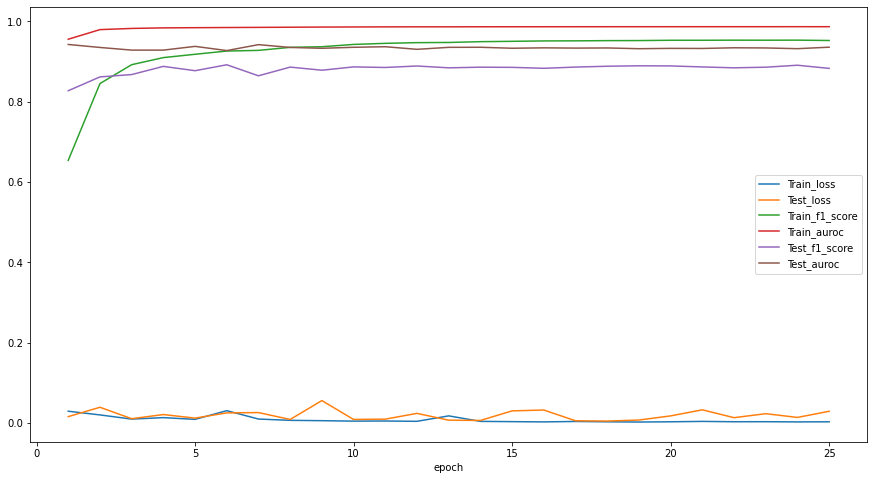

In [4]:
# Plot all the values with respect to the epochs
df.plot(x='epoch',figsize=(15,8));

In [5]:
print(df[['Train_auroc','Test_auroc']].max())

Train_auroc    0.986752
Test_auroc     0.942504
dtype: float64


### Sample Prediction

In [12]:
ino = 289
# Read  a sample image and mask from the data-set
img = cv2.imread(f'/home/brian/Downloads/train_data/Images/{ino:03d}_cam-image1_.jpg').transpose(2,0,1).reshape(1,3,300,650)
mask = cv2.imread(f'/home/brian/Downloads/train_data/Masks/{ino:03d}_cam-image1_mask.png')
with torch.no_grad():
    a = model(torch.from_numpy(img).type(torch.cuda.FloatTensor)/255)

(array([   785., 155983.,   1335.,   1001.,    884.,    895.,    979.,
          1081.,   1432.,  30625.]),
 array([-0.20364779, -0.08328321,  0.03708137,  0.15744595,  0.27781054,
         0.39817512,  0.5185397 ,  0.6389043 ,  0.7592689 ,  0.8796334 ,
         0.99999803], dtype=float32),
 <BarContainer object of 10 artists>)

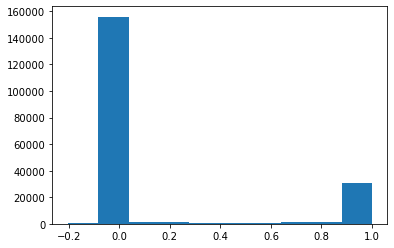

In [13]:
# Plot histogram of the prediction to find a suitable threshold. From the histogram a 0.1 looks like a good choice.
plt.hist(a['out'].data.cpu().numpy().flatten())

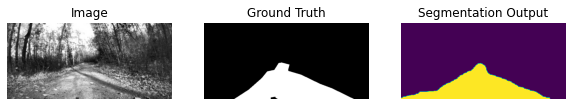

In [14]:
# Plot the input image, ground truth and the predicted output
plt.figure(figsize=(10,10));
plt.subplot(131);
plt.imshow(img[0,...].transpose(1,2,0));
plt.title('Image')
plt.axis('off');
plt.subplot(132);
plt.imshow(mask);
plt.title('Ground Truth')
plt.axis('off');
plt.subplot(133);
plt.imshow(a['out'].cpu().detach().numpy()[0][0]>0.4);
plt.title('Segmentation Output')
plt.axis('off');
# plt.savefig('./SegmentationOutput.png',bbox_inches='tight')